In [1]:
import os
import joblib
import time
import numpy as np
import pandas as pd
import sklearn as sk
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
import imblearn.pipeline as pl
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, SVMSMOTE
plt.style.use('seaborn')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/FinalTestData.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,date,total_usg,mels_S,lig_S,mels_N,hvac_N,hvac_S,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,...,rtu_003_pa_static_stpt_tn,rtu_004_pa_static_stpt_tn,rtu_001_sa_temp,rtu_002_sa_temp,rtu_003_sa_temp,rtu_004_sa_temp,rtu_001_sat_sp_tn,rtu_002_sat_sp_tn,rtu_003_sat_sp_tn,rtu_004_sat_sp_tn
0,9/15/201810:00:00AM,76.35,2.320,0.1,8.725,39.574500,25.629500,12.21,12.23,8.90,...,0.6,0.06,67.9,64.5,65.2,67.8,68.0,65.0,64.0,68.0
1,9/15/201810:15:00AM,69.18,2.290,0.1,8.500,38.684286,19.606154,12.07,11.97,9.56,...,0.6,0.06,67.6,63.8,65.0,69.0,68.0,65.0,64.0,68.0
2,9/15/201810:30:00AM,52.15,2.295,0.1,8.275,22.583333,18.893684,12.11,11.97,9.85,...,0.6,0.06,67.4,63.6,62.7,69.1,68.0,65.0,64.0,68.0
3,9/15/201810:45:00AM,57.18,2.300,0.1,8.050,27.665789,19.060000,12.02,11.91,9.88,...,0.6,0.06,68.3,63.8,64.8,68.2,68.0,65.0,64.0,68.0
4,9/15/201811:00:00AM,68.92,2.100,0.1,8.350,38.834000,19.538500,11.94,11.83,9.80,...,0.6,0.06,68.4,63.6,63.2,66.9,68.0,65.0,64.0,68.0


In [8]:
df.fillna(df.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


#Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X= df[['total_usg', 'air_temp_set_1','air_temp_set_2','dew_point_temperature_set_1d','relative_humidity_set_1','solar_radiation_set_1']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                        feature         VIF
0                     total_usg   10.201325
1                air_temp_set_1  399.221703
2                air_temp_set_2  368.126290
3  dew_point_temperature_set_1d    5.864739
4       relative_humidity_set_1    8.600878
5         solar_radiation_set_1    3.709432


#Preprocessing

In [16]:
# Normalizing the data
from sklearn import preprocessing
x=df.drop(columns=['date','total_usg','mels_S','lig_S','mels_N','hvac_S','hvac_N'])
y=df['total_usg']
x = preprocessing.normalize(x)

In [17]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

#DummyRegressor

In [ ]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="median")

dummy_regr.fit(x_train, y_train)
y_pred=dummy_regr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred )

print("R score:",r)

R score: -4.5243174207065806e-07


#Random Forest Regression


In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)

regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

#Simple SVM

In [ ]:
from sklearn import svm

regress= svm.SVR()
regress.fit(x_train,y_train)


SVR()

In [ ]:
y_pred= regress.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 352.15103331914736
R score: 0.17076256256264122
Mean Absolute Error: 12.344940595868593


#Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}
 
grid = GridSearchCV(svm.SVR(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.222 total time=10.6min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.214 total time=10.5min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.210 total time=10.5min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.213 total time=10.5min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.215 total time=10.4min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.090 total time=10.9min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.085 total time=10.8min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.087 total time=10.7min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.086 total time=10.8min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.085 total time=10.7min
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.015 total time= 6.7min
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;, 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid1.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid1.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVR(C=10, gamma=1)


In [ ]:
grid_predictions = grid1.predict(x_test)

NameError: ignored

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(y_test, grid_predictions )

print("R score:",r)

NameError: ignored

#SVM with Grid Search Params

In [ ]:
from sklearn import svm

regress= svm.SVR(C=10000, gamma=1)
regress.fit(x_train,y_train)


SVR(C=10000, gamma=1)

In [ ]:
y_pred= regress.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 216.83890823454482
R score: 0.48939255152442074
Mean Absolute Error: 9.392049474577139


#Best Feature Selection

In [ ]:
from sklearn import svm
from sklearn.feature_selection import SelectKBest
anova_filter = SelectKBest(k=30)
clf = svm.SVR(C=10000, gamma=1)
pipe = Pipeline(steps=[('anova', anova_filter),('rf', clf)])

In [ ]:
# Fit the pipeline to the training data.
pipe.fit(x_train,y_train)

# Predict the dependent variable of the test set.
y_pred = pipe.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 271.0344664415475
R score: 0.36177405390288153
Mean Absolute Error: 9.901387289701766


#Principal Component Analysis

In [ ]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
from sklearn.decomposition import PCA
n_components = 148
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, x_train.shape[0]))

pca = PCA(n_components=n_components, whiten=True).fit(x_train)

Extracting the top 148 eigenfaces from 71478 faces


In [ ]:
variance = pca.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

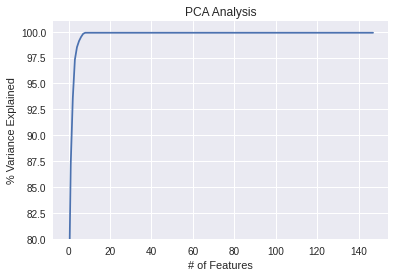

In [ ]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(80,101)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [ ]:
pca = PCA(n_components=30)

In [ ]:
from sklearn import svm
clf = svm.SVR(C=10000, gamma=1)
pipe = Pipeline(steps=[('pca', pca),('rf', clf)])

In [ ]:
pipe

Pipeline(steps=[('pca', PCA(n_components=30)), ('rf', SVR(C=10000, gamma=1))])

In [ ]:
# Fit the pipeline to the training data.
pipe.fit(x_train, y_train)


Pipeline(steps=[('pca', PCA(n_components=30)), ('rf', SVR(C=10000, gamma=1))])

In [ ]:
# Predict the dependent variable of the test set.
y_pred = pipe.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 134.48169674298978
R score: 0.6833254852660932
Mean Absolute Error: 7.221008635485837


#PCA + Best Feature

In [ ]:
from sklearn.pipeline import FeatureUnion

In [ ]:
union = FeatureUnion([("pca", PCA(n_components=50)),
                      ("anova_filter", SelectKBest(k=50))])

In [ ]:
pipe = Pipeline(steps=[('PCA_Anova_filter', union),('rf', svm.SVR(C=10000, gamma=1))])

In [ ]:
# Fit the pipeline to the training data.
pipe.fit(x_train, y_train)

# Predict the dependent variable of the test set.
y_pred = pipe.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 121.36570945794621
R score: 0.7142107210218933
Mean Absolute Error: 6.886433755660808


#Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

In [19]:
y_pred= reg.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 126.64792486022084
R score: 0.7017722774288437
Mean Absolute Error: 7.286893895567309
